# Quantum Gates

Quantum gates are the building blocks of quantum circuits. A quantum gate $U$ is an unitary that takes $|\psi\rangle$ to another valid qubit $|\phi\rangle$. It is important to remember that:

$$
UU^{\dagger} = I
$$

Thus, the gate $U^{\dagger}$ undoes the transformation of $U$. For the Pauli X, Y, and Z gates as well as the Hadamard gate, $U = U^{\dagger}$.

In Python, the gates are a matrix (list of lists) of complex numbers.

We may extract the unitary matrix from a circuit using the **unitary_simulator** in _Qiskit_

In [59]:
%matplotlib inline
from qiskit import *

In [82]:
# The following code is for nicer display of the matrices
from IPython.display import display, Markdown

def format_float(x):
    if x % 1 == 0:
        return int(x)
    else:
        return x

def format_imaginary(z):
    if abs(z.imag) < 1e-15:
        return "{}".format(format_float(z.real))
    elif abs(z.real) < 1e-15:
        if z.imag == 1:
            return "i"
        elif z.imag == -1:
            return "-i"
        return "{}i".format(format_float(z.imag))
    if z.imag > 0:
        return "{} + {}i".format(z.real, abs(z.imag))
    else:
        return "{} - {}i".format(z.real, abs(z.imag))

def display_matrix(gate, gate_name="U"):
    a00 = format_imaginary(gate[0][0])
    a01 = format_imaginary(gate[0][1])
    a10 = format_imaginary(gate[1][0])
    a11 = format_imaginary(gate[1][1])
    ans = r"${} = \begin{{bmatrix}} {} & {} \\ {} & {}\end{{bmatrix}}$".format(gate_name,a00, a01, a10, a11)
    return Markdown(ans)

The Qiskit simulators are available in the _Aer_ module. For this notebook, we will explore mostly the **unitary_simulator** because we are interested in the unitary matrices of the gates.

In [61]:
simulator = Aer.get_backend("unitary_simulator")

The most simple circuit is the quantum wire: a system with no gates.
We can verify that it is represented by the identity matrix, $I = \begin{bmatrix}1 & 0 \\ 0 & 1\end{bmatrix}$.

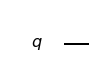

In [62]:
circuit = QuantumCircuit(1)
circuit.draw(output="mpl")

In [63]:
job = execute(circuit, backend=simulator)
result = job.result()
unitary = result.get_unitary()
print(unitary)

[[1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j]]


The first gate we will discuss is the NOT gate, also known as Pauli X gate. It takes $|0\rangle$ to $|1\rangle$ and vice versa. A simple circuit consisting of only the $X$ gate looks like:

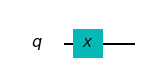

In [64]:
circuit = QuantumCircuit(1)
circuit.x(0)
circuit.draw(output="mpl")

We may also verify that $X = \begin{bmatrix}0 & 1 \\ 1 & 0\end{bmatrix}$ using Qiskit.

In [65]:
unitary = execute(circuit, backend=simulator).result().get_unitary()
display(
    display_matrix(unitary, "X")
)

$X = \begin{bmatrix} 0 & 1 \\ 1 & 0\end{bmatrix}$

We may apply many gates to a circuit. In the circuit below, we apply $X$ followed by $H$. Notice that this is equivalent to applying a single gate $U = HX$ due to matrix multiplication (multiplication of unitary matrices yields a unitary matrix).

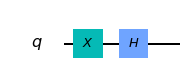

In [66]:
circuit = QuantumCircuit(1)
circuit.x(0)
circuit.h(0)
circuit.draw(output="mpl")

In [67]:
unitary = execute(circuit, backend=simulator).result().get_unitary()
display(
    display_matrix(unitary)
)

$U = \begin{bmatrix} 0.7071067811865475 & 0.7071067811865476 \\ -0.7071067811865476 & 0.7071067811865475\end{bmatrix}$

On a relevant note, different gates may lead to the same composed matrix $U$! Here, we verify that $HX$ = $ZH$.

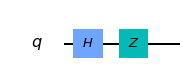

In [68]:
circuit = QuantumCircuit(1)
circuit.h(0)
circuit.z(0)
circuit.draw(output="mpl")

In [69]:
unitary = execute(circuit, backend=simulator).result().get_unitary()
display(
    display_matrix(unitary)
)

$U = \begin{bmatrix} 0.7071067811865476 & 0.7071067811865475 \\ -0.7071067811865475 & 0.7071067811865476\end{bmatrix}$

And gate order matters! Matrix multiplication is not commutative in general. $HZ$ is not the same as $ZH$.

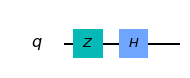

In [70]:
circuit = QuantumCircuit(1)
circuit.z(0)
circuit.h(0)
circuit.draw(output="mpl")

In [71]:
unitary = execute(circuit, backend=simulator).result().get_unitary()
display(
    display_matrix(unitary)
)

$U = \begin{bmatrix} 0.7071067811865476 & -0.7071067811865475 \\ 0.7071067811865475 & 0.7071067811865476\end{bmatrix}$

It is also important to recall that the entries of the matrix may not be real numbers! For example, consider the Pauli Y gate: it has entries that are pure imaginary numbers

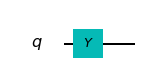

In [72]:
circuit = QuantumCircuit(1)
circuit.y(0)
circuit.draw(output="mpl")

In [73]:
unitary = execute(circuit, backend=simulator).result().get_unitary()
display(
    display_matrix(unitary, "Y")
)

$Y = \begin{bmatrix} 0 & -i \\ i & 0\end{bmatrix}$

We can also verify that the inverse of the Pauli Y gate is itself! Because $Y = Y^{\dagger}$, then $YY = I$.The same would apply for $X$, $Z$ and $H$.

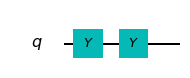

In [74]:
circuit = QuantumCircuit(1)
circuit.y(0)
circuit.y(0)
circuit.draw(output="mpl")

In [75]:
unitary = execute(circuit, backend=simulator).result().get_unitary()
display(
    display_matrix(unitary, "U")
)

$U = \begin{bmatrix} 1 & 0 \\ 0 & 1\end{bmatrix}$

We may take that property for granted because all the matrices analysed so far respect $U = U^{\dagger}$! But this will not always be the case. Consider the $S$ gate, which we have not discussed but is available in Qiskit. The matrix that represents the gate is:

$$
S = \begin{bmatrix}1 & 0 \\ 0 & i\end{bmatrix}
$$

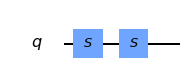

In [76]:
circuit = QuantumCircuit(1)
circuit.s(0)
circuit.s(0)
circuit.draw(output="mpl")

In [77]:
unitary = execute(circuit, backend=simulator).result().get_unitary()
display(
    display_matrix(unitary, "U")
)

$U = \begin{bmatrix} 1 & 0 \\ 0 & -1\end{bmatrix}$

We have just verified that $SS = Z$ and not $I$! The (true) inverse of $S$, $S^{\dagger}$, is available in Qiskit. The matrix that represents the gate is:
$$
S = \begin{bmatrix}1 & 0 \\ 0 & -i\end{bmatrix}
$$

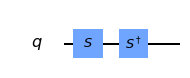

In [78]:
circuit = QuantumCircuit(1)
circuit.s(0)
circuit.sdg(0)  # sdg = s dagger
circuit.draw(output="mpl")

In [79]:
unitary = execute(circuit, backend=simulator).result().get_unitary()
display(
    display_matrix(unitary, "U")
)

$U = \begin{bmatrix} 1 & 0 \\ 0 & 1\end{bmatrix}$

Even though $S \neq S^{\dagger}$, $S^{3} = S^{\dagger}$! The same would apply to $X, Y, Z$ and $H$ because $X^{2}=Y^{2}=Z^{2}=H^{2}=I$. Hence, $H^{3} = H = H^{\dagger}$ for example.

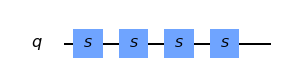

In [80]:
circuit = QuantumCircuit(1)
circuit.s(0)
#circuit.sdg(0)
circuit.s(0)
circuit.s(0)
circuit.s(0)
circuit.draw(output="mpl")

In [81]:
unitary = execute(circuit, backend=simulator).result().get_unitary()
display(
    display_matrix(unitary, "U")
)

$U = \begin{bmatrix} 1 & 0 \\ 0 & 1\end{bmatrix}$